<a href="https://www.kaggle.com/code/supriya21k/titanic-linear-logistics-regression-implementation?scriptVersionId=231161557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Loading dataset
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")
df_gender_submission=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
df_train.shape

(891, 12)

In [6]:
# checking the null values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print(df_train['Cabin'].mode())

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object


In [8]:
# imputing the null values column "Cabin" with mode
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0], inplace=True)

In [9]:
df_train = df_train.dropna(subset=['Age', 'Embarked'])

In [10]:
# Checking null values
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

#making instance of labelencoder()
le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 712, dtype: int64

In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S


In [13]:
print(df_train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [14]:
X=df_train.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin','Embarked'])
y=df_train['Survived']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
X_train.shape, y_train.shape, X_test.shape

((534, 6), (534,), (178, 6))

In [17]:
from sklearn.preprocessing import StandardScaler
# Scale the data.
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression model**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import LinearRegression.
from sklearn.linear_model import LinearRegression

model=LinearRegression()
# Fit the model to the training data.
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions on the testing data.
y_pred = model.predict(X_test)

In [20]:
# Import metrics.
from sklearn.metrics import mean_squared_error, r2_score


# Calculate and print R^2 score.
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.4653


**r2_score**: calculates the R-squared (R²) score, a statistical measure that represents the proportion of the variance for a dependent variable which is explained by an independent variable or variables in a regression model. Here, y_test is the actual values, and y_pred is the predicted values from your model.

In [21]:
# Calculate and print MSE.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

Mean squared error: 0.1276
Root mean squared error: 0.3572


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the correlation matrix.
corr_matrix = X.corr()


# Identify pairs of features with high collinearity (correlation > 0.8 or < -0.8).
high_corr_features = [(col1, col2, corr_matrix.loc[col1, col2])
                     for col1 in corr_matrix.columns
                     for col2 in corr_matrix.columns
                     if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]


# Convert to a DataFrame for better visualization.
collinearity_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print("\nHighly Correlated Features:\n", collinearity_df)


# Compute Variance Inflation Factor (VIF) for each feature.
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Print VIF values.
print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)


Highly Correlated Features:
 Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []

Variance Inflation Factor (VIF) for each feature:
   Feature       VIF
0  Pclass  4.330115
1     Sex  3.002154
2     Age  3.748489
3   SibSp  1.622903
4   Parch  1.611383
5    Fare  1.657340


In [23]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data (Standardization).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a linear regression model and train it.
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Make predictions on the test set.
y_pred = model.predict(X_test_scaled)


# Calculate performance metrics.
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Print evaluation metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean squared error: {mse:.4f}")
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.3185
Mean squared error: 0.1680
Root mean squared error: 0.4098


In [24]:
print("Intercept:", model.intercept_)


coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nFeature Coefficients:\n", coeff_df)

Intercept: 0.3954305799648506

Feature Coefficients:
   Feature  Coefficient
0  Pclass    -0.176733
1     Sex    -0.240873
2     Age    -0.080157
3   SibSp    -0.046731
4   Parch    -0.003065
5    Fare    -0.005537


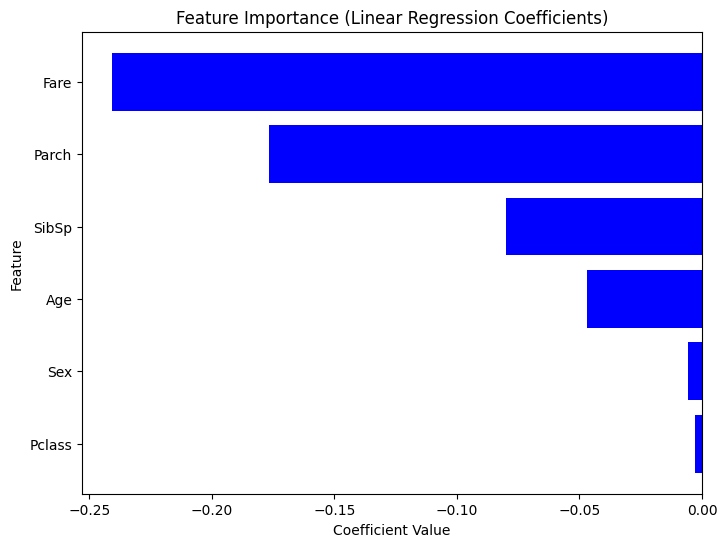

In [25]:
# Sort dataframe by coefficients.
coeff_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)


# Create plot.
plt.figure(figsize=(8,6))
plt.barh(coeff_df["Feature"], coeff_df_sorted["Coefficient"], color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

From the above plot, it is evident that the column "Fare" and "parch" are the most important features of Titanic dataset for predicting the survival of passengers.

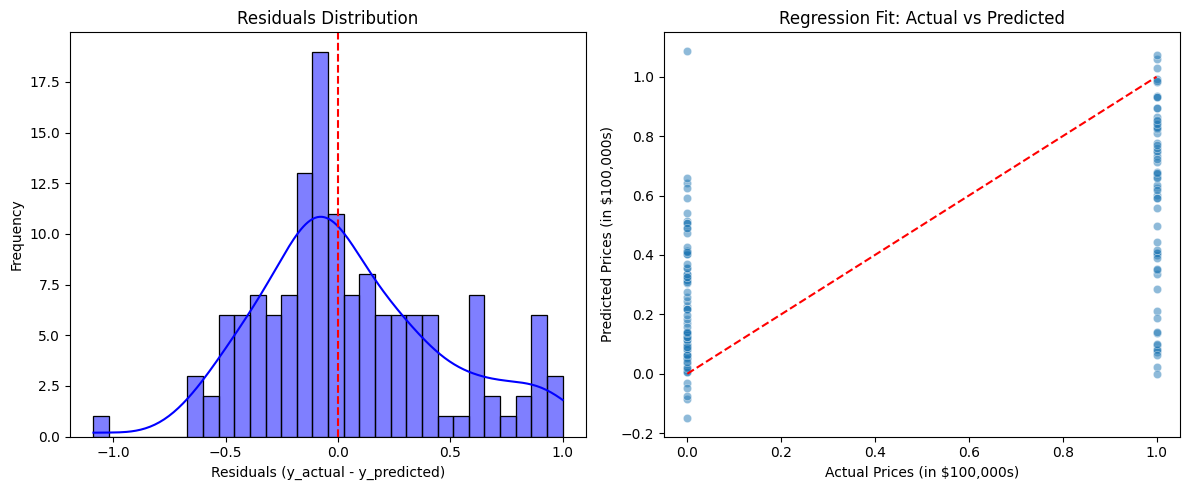

In [26]:
# Compute residuals.
residuals = y_test - y_pred


# Create plots.
plt.figure(figsize=(12,5))


# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")


# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Prices (in $100,000s)")
plt.ylabel("Predicted Prices (in $100,000s)")


# Show plots.
plt.tight_layout()
plt.show()

- The residuals distribution (left plot) should be centered around zero, indicating that errors are randomly distributed. Here, the residuals doesn't follow a normal distribution, that is there is skewness or a trend, which suggests systematic errors.

- The regression fit (right plot) compares actual vs. predicted values, with the red dashed line representing a perfect fit. Here, points are nowhere near the line, predictions are inaccurate and the relationship is not truly linear. 

These visualizations help diagnose overfitting or underfitting, reveal patterns in residuals that suggest missing relationships, and provide a clear assessment of the model's effectiveness.

We can say from this linear regression implementation that, linear regression model cannot be used in this dataset predicting y_pred.

# **Logistic Regression**

In [27]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
LR = LogisticRegression(random_state=16, max_iter=1000)

# fit the model with data
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

Confusion Matrix:
[[73  7]
 [22 41]]

Confusion Matrix (crosstab):
Predicted   0  1
Actual          
0          17  5
1           7  0


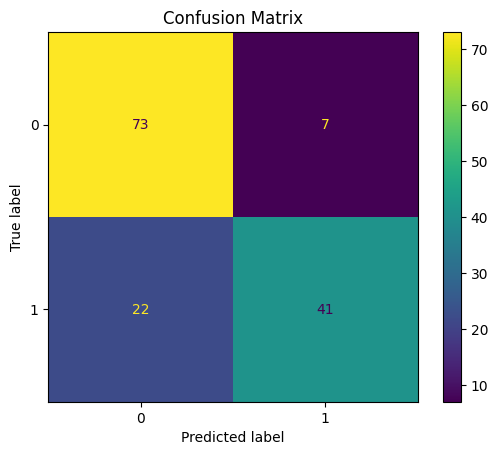


Accuracy: 0.7972
Precision: 0.8542
Recall: 0.6508
F1 Score: 0.7387

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



In [28]:
# Import necessary metrics functions
from sklearn import metrics
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Create a more visually appealing confusion matrix
y_test_series = pd.Series(y_test, name='Actual')
y_pred_series = pd.Series(y_pred, name='Predicted')
confusion = pd.crosstab(y_test_series, y_pred_series)
print("\nConfusion Matrix (crosstab):")
print(confusion)

# Visualize the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# For a comprehensive classification report
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))

The model has predicted the survival, and the metrics are calculated based on the comparison of the predicted values with the actual values.


The precision, recall, and f1-score are three commonly used metrics to evaluate the performance of a binary classification model. Precision measures the proportion of true positives among all the positive predictions, while recall measures the proportion of true positives among all the actual positives. F1-score is the harmonic mean of precision and recall.

We got a classification rate of 80%, considered as good accuracy.

Precision: Precision is about being precise, i.e., how accurate the model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our case the logistic regression model predicts the titanic passengers survival 85% of the time.

Recall: logistic regression model can predict the survived passengers in the test set 65% of the time.

**Conclusion**: We implemented both Linear and Logistic regression, we analyzed that Linear regression was not accurate for this dataset and the logistic regression predicted the titanic passenger survival with increased accuracy of model to 80%.